In [29]:
import numpy as np
import astropy.units as u
import astropy.constants as const
from astropy.visualization import quantity_support
quantity_support()

import matplotlib.pyplot as plt

In [30]:
%config InlineBackend.figure_format = "retina"

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 18

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

# Question 1

## Part a

In [9]:
planet_density = ((3 * const.M_jup) / (4/3 * np.pi * const.R_earth**3)).to(u.g / u.cm**3)

In [22]:
planet_density

<Quantity 5239.4221312 g / cm3>

In [23]:
iron_density = 7.9 * u.g / u.cm**3

In [24]:
planet_density > iron_density

True

# Question 2

## Part a/b

In [31]:
def eos(P, rho_0=1.46 * u.g / u.cm**3, K=3.11e-6 * u.g / u.cm**3, n=0.513):
    return rho_0 + K * u.Pa**(-n) * P**n

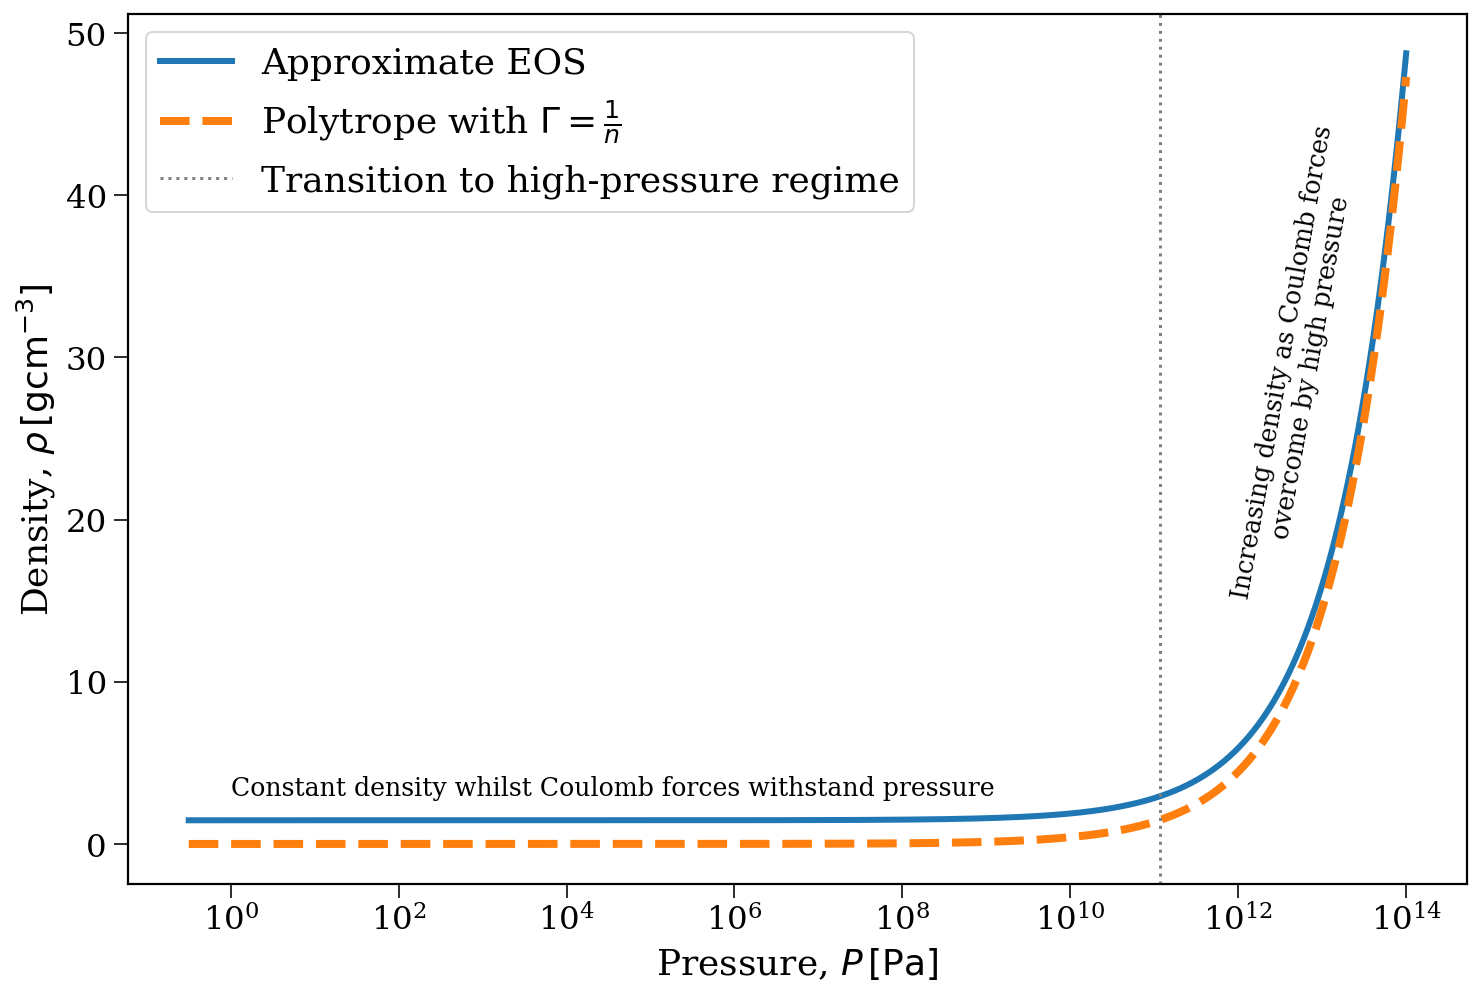

In [80]:
fig, ax = plt.subplots()

pressure_range = np.logspace(-0.5, 14, 1000) * u.Pa

density_approx_eos = eos(pressure_range)
ax.semilogx(pressure_range, density_approx_eos, lw=3, label="Approximate EOS")
ax.semilogx(pressure_range, eos(pressure_range, rho_0=0 * u.g / u.cm**3), lw=4,
            linestyle="--", label=r"Polytrope with $\Gamma=\frac{1}{n}$")

transition_pressure = pressure_range[density_approx_eos > density_approx_eos[0] * 2][0]
ax.axvline(transition_pressure, color="grey", linestyle="dotted", label="Transition to high-pressure regime")

ax.legend()

ax.set_xlabel(r"Pressure, $P \, [\rm Pa]$")
ax.set_ylabel(r"Density, $\rho \, [\rm g cm^{-3}]$")

ax.annotate("Constant density whilst Coulomb forces withstand pressure", xy=(1e0, 3), fontsize=0.7*fs)
ax.annotate("Increasing density as Coulomb forces\novercome by high pressure", xy=(5e12, 15),
            rotation=80, fontsize=0.7*fs, ha="center")

plt.savefig("../figures/2a.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [58]:
transition_pressure

<Quantity 1.1696827e+11 Pa>

## Part d

In [60]:
rho0 = 1.46 * u.g / u.cm**3
r = np.sqrt(3/2 * 1e11 * u.Pa / (const.G * np.pi * rho0**2))
max_mass = 4 * np.pi * rho0 * r**3
max_mass.to(u.M_earth).round(1)

<Quantity 18.9 earthMass>

# Question 3

## part c

In [55]:
M_rad = const.m_p * (const.G * const.m_p**2 / (const.c * const.h))**(-3/2)
M_rad.to(u.M_sun)

<Quantity 29.18804672 solMass>